# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [50]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [51]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [52]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.38590267700963377
rmse median 0.4701151682471765


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [53]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [54]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.1135197834835845
mean error unbiased 0.034226919269151404


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [55]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

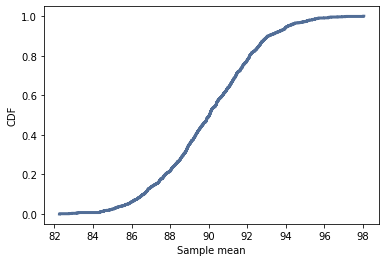

In [56]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [57]:
np.mean(xbars)

89.9942277175831

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [58]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.82414103784878, 94.11262667519776)

And the RMSE of the sample means is called the standard error.

In [59]:
stderr = RMSE(xbars, 90)
stderr

2.5494803429669255

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [60]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.0487716769935096
rmse Lm 1.598732122978578
mean error L 0.3098222321405376
mean error Lm 0.3894119669738184


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [61]:
import random

#Similar experiments for median
def Estimate4(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('mean error x bar',MeanError(means,mu))
    print('mean error median',MeanError(medians,mu))
    
Estimate4()

mean error x bar 0.005779850422387815
mean error median 0.002964637094712265


In [62]:
import random

#Similar experiments for median
def Estimate5(n=7, iters=100000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('mean error x bar',MeanError(means,mu))
    print('mean error median',MeanError(medians,mu))
    
Estimate5()

mean error x bar 0.0008300422574471755
mean error median -0.00023540011112560742


In [63]:
def Estimate6(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('RMSE sigma**2 biased', RMSE(estimates1, sigma**2))
    print('RMSE sigma**2 unbiased', RMSE(estimates2, sigma**2))
    
Estimate6()

RMSE sigma**2 biased 0.5135702498034801
RMSE sigma**2 unbiased 0.5774019151616316


In [64]:
def Estimate7(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('RMSE sigma**2 biased', RMSE(estimates1, sigma**2))
    print('RMSE sigma**2 unbiased', RMSE(estimates2, sigma**2))
    
Estimate7()

RMSE sigma**2 biased 0.5166123238587633
RMSE sigma**2 unbiased 0.5800578735562174


For running similar experiments to see if x-bar and the median are biased estimates of mu, they are both relatively close to zero at 1000 iterations. As the number of estimations increases, the mean errors of the estimates gets closer to zero, which means that they are more likely to be non-biased estimates of mu. 

For checking if the biased estimator of sigma^2 or the unbiased estimated of sigma^2 yields a lower RMSE, it turns out that the biased estimator has a lower RMSE value by about .60. Therefore, the biased estimator should be off from the actual result a little less than the unbiased estimator. This difference persists as the number of estimations increases as well!

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



Standard Error 0.7855741362637393
90% CI (1.3869615208056516, 3.242879236689911)


(10, 0.7855741362637393)

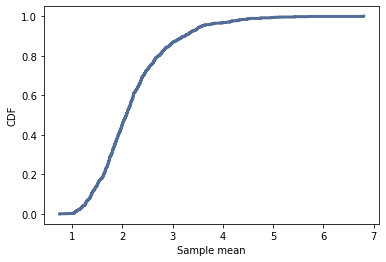

In [65]:
# Solution goes here

def n10(n=10, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    cdf = thinkstats2.MakeCdfFromList(means)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    ci = cdf.Percentile(10),cdf.Percentile(90)
    stderr = RMSE(means,lam)

    print('Standard Error',stderr)
    print('90% CI',ci)
    
    return n,stderr
    
    
n10()

Standard Error 0.5372576336886766
90% CI (1.5550524848404126, 2.827966667234)


(20, 0.5372576336886766)

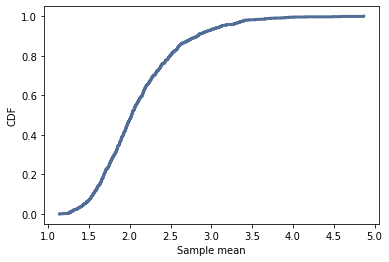

In [66]:
# Solution goes here# Solution goes here

def n20(n=20, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    cdf = thinkstats2.MakeCdfFromList(means)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    ci = cdf.Percentile(10),cdf.Percentile(90)
    stderr = RMSE(means,lam)

    print('Standard Error',stderr)
    print('90% CI',ci)
    
    return n,stderr
    
    
n20()

Standard Error 0.40157234121669144
90% CI (1.6013676767635847, 2.6128621317538077)


(30, 0.40157234121669144)

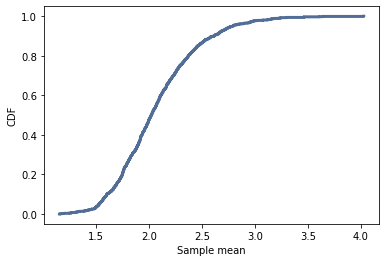

In [67]:
# Solution goes here# Solution goes here

def n30(n=30, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    cdf = thinkstats2.MakeCdfFromList(means)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    ci = cdf.Percentile(10),cdf.Percentile(90)
    stderr = RMSE(means,lam)

    print('Standard Error',stderr)
    print('90% CI',ci)
    
    return n,stderr
    
    
n30()

Text(0, 0.5, 'standard errors')

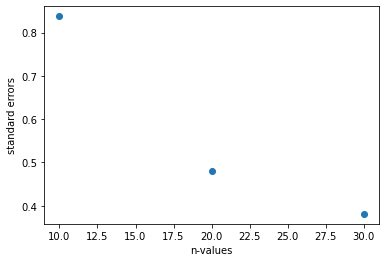

In [68]:
#Plotting standard error versus n
n = [10,20,30]
stderr = [0.8376440805823729,0.4811277342924511,0.38100153549922156]

matplotlib.pyplot.scatter(n,stderr)
matplotlib.pyplot.xlabel("n-values")
matplotlib.pyplot.ylabel("standard errors")

For sample size n = 10:
- Standard error: 0.84
- 90% Confidence Interval: 90% CI (1.4005182670189151, 3.2367489560721068)

As the sample size increased by 10 units (10,20,30), the standard error continued to decrease and the confidence interval started to narrow in range, giving more certainty around the reliability of our lam estimate (estimate L). Also, all of the confidence intervals contain our lam value of 2.0. 